In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
import pickle
from sklearn import metrics

In [2]:
IT_Ticket_cleaned = pd.read_excel('Cleaned_data.xlsx')
IT_Ticket_cleaned.shape

(8432, 12)

In [3]:
Empty_Rows = IT_Ticket_cleaned[IT_Ticket_cleaned.isnull().any(axis=1)].index
IT_Ticket_cleaned.drop(Empty_Rows,axis = 0,inplace = True)

In [4]:
IT_Ticket_cleaned['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_49', 'GRP_50', 'GRP_51',
       'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57',
       'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32', 'GRP_62',
       'GRP_63', 'GRP_64', 'GRP_48', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(IT_Ticket_cleaned['Cleaned'],IT_Ticket_cleaned['Assignment group'],test_size=0.25,random_state=10)

In [6]:
import pickle
for i in range(6):
    pickled = open("elmo_full_train_" + str(i+1) +".pickle","rb")
    temp = pickle.load(pickled)
    if i == 0:
        elmo_train_vectors = temp
    else:
        elmo_train_vectors = np.concatenate((elmo_train_vectors,temp), axis = 0)

In [7]:
for i in range(6):
    pickled = open("elmo_full_test_" + str(i+1) +".pickle","rb")
    temp = pickle.load(pickled)
    if i == 0:
        elmo_test_vectors = temp
    else:
        elmo_test_vectors = np.concatenate((elmo_test_vectors,temp), axis = 0)

In [8]:
elmo_test_vectors.shape

(2100, 1024)

In [9]:
X = np.concatenate((elmo_train_vectors,elmo_test_vectors), axis = 0)
Y = np.concatenate((y_train,y_test),axis = 0)

In [10]:
# Preparing Dataframe for top 8 and Top 10
ELmo_df = pd.DataFrame(X)
ELmo_df['Assignment Group'] = Y

In [11]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
Y = label_enc.fit_transform(Y)

# 74 classes

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(ELmo_df.drop(['Assignment Group'],axis =1),Y,test_size=0.25,random_state=10)

In [13]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler
enc = StandardScaler()
# Fitting Train Data to prevent data leakage
enc.fit(x_train,y_train)
# Transforming to scale the data
x_train = enc.transform(x_train)
x_test = enc.transform(x_test)

In [14]:
# from imblearn.over_sampling import SMOTE
# # transform the dataset
# oversample = SMOTE()
# x_train,y_train = oversample.fit_resample(x_train,y_train)

[0.78049153 0.8063005  0.82568085 0.8385272  0.8489189  0.8578714
 0.8662109  0.8721605  0.87764484 0.88227165 0.8860115  0.8895359
 0.89282036 0.89596635 0.8989017  0.90163285 0.9040718  0.906353
 0.9086069  0.9107318  0.91252774 0.9142648  0.91595936 0.917526
 0.9190472  0.92052126 0.92185044 0.923144   0.9243873  0.9256188
 0.9268407  0.9280126  0.9291342  0.93023705 0.9313197  0.93238294
 0.93338037 0.9343536  0.93529844 0.9362303  0.9371415  0.93803173
 0.9388995  0.9397447  0.94058484 0.9414172  0.9422189  0.94299644
 0.9437634  0.94450516 0.94521916 0.945918   0.94659984 0.9472729
 0.9479392  0.94859415 0.9492314  0.9498605  0.9504666  0.95105636
 0.95164096 0.9522197  0.95278025 0.9533335  0.9538686  0.9543882
 0.95490104 0.9554042  0.95590025 0.95639074 0.95687425 0.9573469
 0.9578117  0.9582689  0.9587164  0.95915884 0.95959485 0.96002865
 0.9604592  0.96087766 0.96129376 0.9617007  0.962102   0.96248734
 0.96287    0.9632409  0.96360946 0.9639738  0.96433324 0.9646855
 0.965

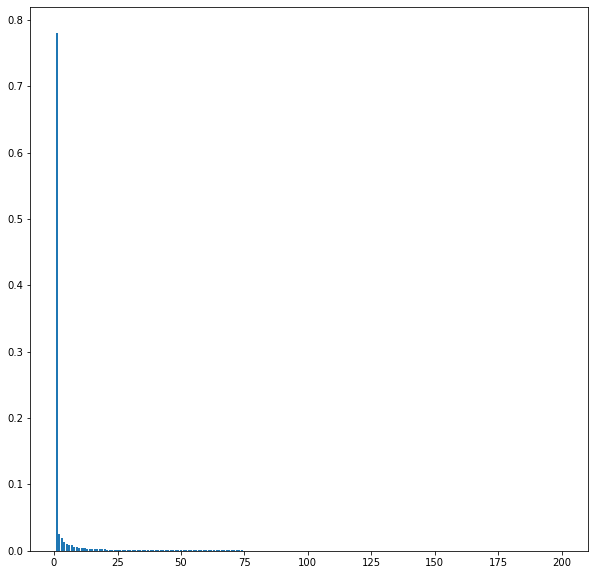

In [15]:
# Intializing the PCA model
from sklearn.decomposition import PCA
# Setting the value of n_components to 15 to get complete variance of the data set
pca = PCA(n_components= 200,random_state = 7)
pca.fit(x_train) #
plt.figure(figsize=(10,10))
plt.bar(np.arange(1,201),pca.explained_variance_ratio_)
# plt.step(np.arange(1,1025),np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

In [16]:
# Setting the value of n_components to 7 to get 95% variance of the data set
pca = PCA(n_components= 200,random_state = 7)
pca.fit(x_train)

PCA(n_components=200, random_state=7)

In [17]:
# Transforming the training , validation and test sets in the new selected attributes
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [18]:
# Intialising the model
from sklearn.svm import SVC
svm = SVC(probability= True)

# Checking the accuracy of the model on training data
svm.fit(x_train,y_train)
print('SVM Classifier score = ' + str(svm.score(x_train,y_train)))
print('SVM Classifier score = ' + str(svm.score(x_test,y_test)))



SVM Classifier score = 0.5989202921562401
SVM Classifier score = 0.5771428571428572


# Top 8

In [19]:
# Selecting the Groups having more than 100 Indiviual records
Counts = pd.DataFrame(ELmo_df['Assignment Group'].value_counts())
Others = []
for Group in ELmo_df['Assignment Group'].unique():
    if Counts.loc[Group][0] < 195:
        Others.append(Group)
print('{0} Groups in dataset have less than 100 samples'.format(len(Others)))

ELmo_df['Assignment RE-group'] =ELmo_df['Assignment Group'].apply(lambda x: 'Others' if x in Others else x)

66 Groups in dataset have less than 100 samples


In [20]:
Top_8 = ELmo_df[ELmo_df['Assignment RE-group'] != 'Others']

In [21]:
Top_8['Assignment Group'].unique()

array(['GRP_9', 'GRP_0', 'GRP_19', 'GRP_24', 'GRP_8', 'GRP_3', 'GRP_12',
       'GRP_2'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
Y = label_enc.fit_transform(Top_8['Assignment Group'])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Top_8.drop(['Assignment Group','Assignment RE-group'],axis =1),Y,test_size=0.25,random_state=10)

In [23]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler
enc = StandardScaler()
# Fitting Train Data to prevent data leakage
enc.fit(x_train,y_train)
# Transforming to scale the data
x_train = enc.transform(x_train)
x_test = enc.transform(x_test)

[0.79748464 0.8202304  0.8374709  0.8497974  0.8605256  0.8691793
 0.87700266 0.88313687 0.8887204  0.89308774 0.89668405 0.9000014
 0.9030936  0.9060697  0.90887654 0.9115759  0.91388315 0.91607827
 0.91824085 0.9202089  0.9220039  0.92362523 0.92514336 0.9266594
 0.92805195 0.9294286  0.9307111  0.9319644  0.93316174 0.93432957
 0.93547076 0.9365847  0.93764395 0.9386744  0.9396493  0.94060856
 0.9415518  0.94247735 0.94335437 0.9442119  0.94506454 0.9459039
 0.94671017 0.9474916  0.9482556  0.949001   0.9497372  0.95046633
 0.9511703  0.95184666 0.9525083  0.9531512  0.95378137 0.9544016
 0.95501876 0.9556135  0.9561789  0.9567396  0.95728934 0.95783275
 0.95836025 0.9588722  0.95937544 0.9598747  0.9603629  0.9608436
 0.9613138  0.9617724  0.9622253  0.96267134 0.963107   0.96353745
 0.96396327 0.9643802  0.9647891  0.96518546 0.9655765  0.9659652
 0.9663464  0.96671903 0.9670875  0.96745    0.9678073  0.96815765
 0.96850187 0.96884537 0.9691809  0.96951085 0.96983576 0.9701534
 0.

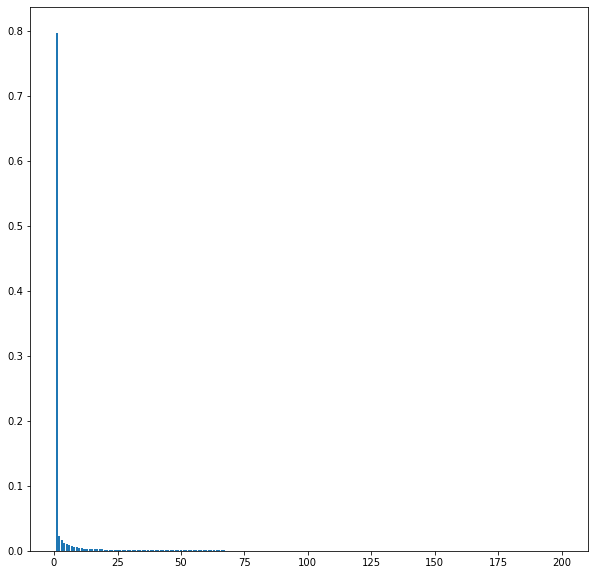

In [24]:
# Intializing the PCA model
from sklearn.decomposition import PCA
# Setting the value of n_components to 15 to get complete variance of the data set
pca = PCA(n_components= 200,random_state = 7)
pca.fit(x_train) #
plt.figure(figsize=(10,10))
plt.bar(np.arange(1,201),pca.explained_variance_ratio_)
# plt.step(np.arange(1,1025),np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

In [25]:
pca = PCA(n_components= 200,random_state = 7)
pca.fit(x_train)

PCA(n_components=200, random_state=7)

In [26]:
# Transforming the training , validation and test sets in the new selected attributes
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [27]:
# Intialising the model
from sklearn.svm import SVC
svm = SVC(probability= True)

# Checking the accuracy of the model on training data
svm.fit(x_train,y_train)
print('SVM Classifier score = ' + str(svm.score(x_train,y_train)))
print('SVM Classifier score = ' + str(svm.score(x_test,y_test)))

SVM Classifier score = 0.7863266652011431
SVM Classifier score = 0.8009228740936059


# Top_5

In [28]:
# Selecting the Groups having more than 100 Indiviual records
Counts = pd.DataFrame(ELmo_df['Assignment Group'].value_counts())
Others = []
for Group in ELmo_df['Assignment Group'].unique():
    if Counts.loc[Group][0] < 250:
        Others.append(Group)
print('{0} Groups in dataset have less than 100 samples'.format(len(Others)))

ELmo_df['Assignment RE-group'] =ELmo_df['Assignment Group'].apply(lambda x: 'Others' if x in Others else x)

69 Groups in dataset have less than 100 samples


In [29]:
Top_5 = ELmo_df[ELmo_df['Assignment RE-group'] != 'Others']

In [30]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
Y = label_enc.fit_transform(Top_5['Assignment Group'])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Top_5.drop(['Assignment Group','Assignment RE-group'],axis =1),Y,test_size=0.25,random_state=10)

In [31]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler
enc = StandardScaler()
# Fitting Train Data to prevent data leakage
enc.fit(x_train,y_train)
# Transforming to scale the data
x_train = enc.transform(x_train)
x_test = enc.transform(x_test)

[0.78875947 0.81391484 0.8316557  0.8444606  0.8558882  0.86602837
 0.87408656 0.8813419  0.8868481  0.89137775 0.89529276 0.89876646
 0.9019518  0.9049667  0.9078694  0.9106116  0.91298556 0.91527176
 0.91742885 0.91947067 0.92127395 0.92298716 0.9246278  0.92619956
 0.9276444  0.92907065 0.93042684 0.93176126 0.9329764  0.9341586
 0.93531805 0.9364274  0.93750626 0.9385651  0.9395929  0.94059616
 0.941577   0.9425214  0.943433   0.94430953 0.9451758  0.94602835
 0.946843   0.9476213  0.94838685 0.9491307  0.9498744  0.950608
 0.9513313  0.9520244  0.9526942  0.9533381  0.95396924 0.95459414
 0.95520306 0.9557945  0.9563736  0.95694435 0.95750624 0.95805144
 0.958584   0.95910305 0.95962167 0.96010846 0.9605946  0.96107686
 0.9615513  0.96202236 0.9624826  0.9629364  0.9633795  0.96381724
 0.96423787 0.96465516 0.9650634  0.9654576  0.9658455  0.9662316
 0.9666139  0.9669866  0.96735036 0.9677092  0.9680653  0.9684138
 0.9687559  0.96909386 0.9694299  0.9697571  0.9700825  0.97040397


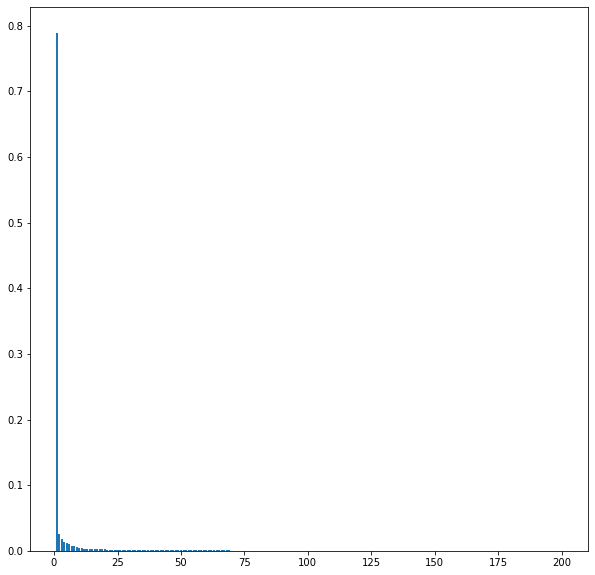

In [32]:
# Intializing the PCA model
from sklearn.decomposition import PCA
# Setting the value of n_components to 15 to get complete variance of the data set
pca = PCA(n_components= 200,random_state = 7)
pca.fit(x_train) #
plt.figure(figsize=(10,10))
plt.bar(np.arange(1,201),pca.explained_variance_ratio_)
# plt.step(np.arange(1,1025),np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

In [33]:
pca = PCA(n_components= 200,random_state = 7)
pca.fit(x_train)

PCA(n_components=200, random_state=7)

In [34]:
# Transforming the training , validation and test sets in the new selected attributes
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [35]:
# Intialising the model
from sklearn.svm import SVC
svm = SVC(probability= True)

# Checking the accuracy of the model on training data
svm.fit(x_train,y_train)
print('SVM Classifier score = ' + str(svm.score(x_train,y_train)))
print('SVM Classifier score = ' + str(svm.score(x_test,y_test)))

SVM Classifier score = 0.8879034244887903
SVM Classifier score = 0.8810051736881005
